In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('/Users/aman/Desktop/NASSCOM/TheScripter-s/Preprocessing/Weather/all_data.csv')

In [3]:
df

,Date,Location,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,2019-01-01,Adilabad,17.333333,17.333333,17.333333,36.6,37.11,NaN,2.2,NaN,...,6.2,0.0,1023.0,Smoke Or Haze,19.6772,78.5331,"Adilabad, TS, India","Adilabad, TS, India",NaN,Clear
1,2019-01-02,Adilabad,26.333333,28.833333,27.611111,47.7,31.90,81.4,0.0,NaN,...,6.2,50.0,1016.8,Smoke Or Haze,19.6772,78.5331,"Adilabad, TS, India","Adilabad, TS, India",NaN,Partially cloudy
2,2019-01-03,Adilabad,16.166667,27.055556,21.611111,48.8,48.47,79.8,0.0,NaN,...,6.2,20.0,1018.8,Smoke Or Haze,19.6772,78.5331,"Adilabad, TS, India","Adilabad, TS, India",NaN,Clear
3,2019-01-04,Adilabad,16.666667,28.333333,22.500000,54.2,53.63,83.1,0.0,NaN,...,6.2,25.0,1017.8,Smoke Or Haze,19.6772,78.5331,"Adilabad, TS, India","Adilabad, TS, India",NaN,Clear
4,2019-01-05,Adilabad,17.333333,28.055556,22.722222,53.6,54.31,81.4,0.0,NaN,...,6.2,25.0,1016.5,Smoke Or Haze,19.6772,78.5331,"Adilabad, TS, India","Adilabad, TS, India",NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,2023-02-16,Warangal,16.333333,31.333333,23.833333,53.1,53.88,85.8,0.0,NaN,...,6.2,30.0,1012.3,NaN,17.9841,79.6020,"Warangal Urban, TS, India","Warangal Urban, TS, India",NaN,Clear
7797,2023-02-17,Warangal,18.333333,31.055556,24.722222,60.2,63.41,87.0,0.0,NaN,...,6.2,30.0,1012.7,NaN,17.9841,79.6020,"Warangal Urban, TS, India","Warangal Urban, TS, India",NaN,Clear
7798,2023-02-18,Warangal,20.333333,29.055556,24.722222,64.1,69.43,85.0,0.0,NaN,...,4.3,30.0,1012.7,Smoke Or Haze,17.9841,79.6020,"Warangal Urban, TS, India","Warangal Urban, TS, India",NaN,Clear
7799,2023-02-19,Warangal,20.333333,31.055556,25.722222,63.4,66.59,87.6,0.0,NaN,...,6.2,30.0,1013.1,NaN,17.9841,79.6020,"Warangal Urban, TS, India","Warangal Urban, TS, India",NaN,Clear


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7801 entries, 0 to 7800
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 7801 non-null   object 
 1   Location             7801 non-null   object 
 2   Minimum Temperature  7801 non-null   float64
 3   Maximum Temperature  7801 non-null   float64
 4   Temperature          7801 non-null   float64
 5   Dew Point            7801 non-null   float64
 6   Relative Humidity    7801 non-null   float64
 7   Heat Index           7791 non-null   float64
 8   Wind Speed           7801 non-null   float64
 9   Wind Gust            0 non-null      float64
 10  Wind Direction       7776 non-null   float64
 11  Wind Chill           0 non-null      float64
 12  Precipitation        7801 non-null   float64
 13  Precipitation Cover  7801 non-null   float64
 14  Snow Depth           3124 non-null   float64
 15  Visibility           7801 non-null   f

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [103]:
# start_date='2023-01-01'
# end_date= '2023-12-31'

# districts = ['Adilabad','Nizamabad','Khammam','Karimnagar','Warangal']

# dfs = []
# for district in districts:
#     temp = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': district,'temp_min (⁰C)': 0,'temp_max (⁰C)':0,'humidity_min (%)':0,'humidity_max (%)':0,'wind_speed_min (Kmph)':0,'wind_speed_max (Kmph)':0})
#     dfs.append(temp)

# combined_df = pd.concat(dfs, ignore_index=True)
# df = pd.concat([df, combined_df])
# df['Date'] = pd.to_datetime(df['Date']).dt.date

# Model Building

In [6]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Function to Fit SARIMAX Model and Forecast

def fit_and_forecast(variable, train_data, test_data):
    # Creating SARIMAX Model
    model = SARIMAX(train_data[variable], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()

    # Predicting Variable
    start_date = test_data.index[0]
    end_date = test_data.index[-1]
    predictions = results.predict(start=start_date, end=end_date, dynamic=False)

    # Evaluating Model Performance
    mse = mean_squared_error(test_data[variable], predictions)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error for {}: {:.2f}".format(variable, rmse))
    
    mape = mean_absolute_percentage_error(test_data[variable], predictions)
    print("Mean Absolute Percentage Error for {}: {:.2f}".format(variable, mape))
    
    
    return predictions


# ADILABAD

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_8953/603963559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adilabad['Date'] = pd.to_datetime(df_adilabad['Date'])


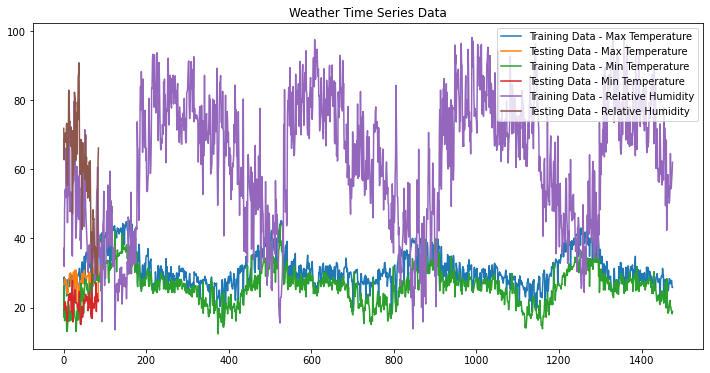

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33839D+00    |proj g|=  1.21878D-01

At iterate    5    f=  2.20371D+00    |proj g|=  3.51381D-02

At iterate   10    f=  2.18908D+00    |proj g|=  1.58081D-02

At iterate   15    f=  2.18699D+00    |proj g|=  6.47585D-03

At iterate   20    f=  2.18662D+00    |proj g|=  4.77352D-04

At iterate   25    f=  2.18658D+00    |proj g|=  9.33102D-04

At iterate   30    f=  2.18657D+00    |proj g|=  1.22833D-04

At iterate   35    f=  2.18657D+00    |proj g|=  4.16562D-05

At iterate   40    f=  2.18657D+00    |proj g|=  1.19537D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  2.34381D+00    |proj g|=  1.19290D-01

At iterate   10    f=  2.32969D+00    |proj g|=  1.45163D-02

At iterate   15    f=  2.32468D+00    |proj g|=  1.48126D-03

At iterate   20    f=  2.32433D+00    |proj g|=  1.35979D-03

At iterate   25    f=  2.32428D+00    |proj g|=  6.83123D-04

At iterate   30    f=  2.32428D+00    |proj g|=  2.82456D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     39      1     0     0   7.120D-05   2.324D+00
  F =   2.3242777291085317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Root Mean Squared Error for Maximum Temperature: 4.

 This problem is unconstrained.



At iterate    5    f=  3.56889D+00    |proj g|=  6.96507D-02

At iterate   10    f=  3.55004D+00    |proj g|=  8.35448D-03

At iterate   15    f=  3.54774D+00    |proj g|=  5.06222D-04

At iterate   20    f=  3.54755D+00    |proj g|=  8.10039D-03

At iterate   25    f=  3.54724D+00    |proj g|=  1.26129D-03

At iterate   30    f=  3.54721D+00    |proj g|=  5.87091D-04

At iterate   35    f=  3.54721D+00    |proj g|=  3.27466D-04

At iterate   40    f=  3.54721D+00    |proj g|=  7.19798D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     52      1     0     0   4.261D-06   3.547D+00
  F =   3.54720772910

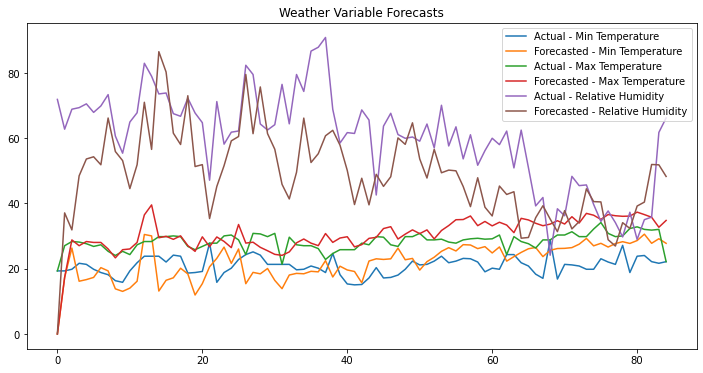

In [9]:
# Loading Weather Data

df_adilabad = df[df['Location'] == 'Adilabad']

df_adilabad['Date'] = pd.to_datetime(df_adilabad['Date'])
df_adilabad.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_adilabad['2019-01-01':'2022-11-30'].reset_index(drop=True)
test_data = df_adilabad['2022-12-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['Maximum Temperature'], label='Training Data - Max Temperature')
plt.plot(test_data['Maximum Temperature'], label='Testing Data - Max Temperature')
plt.plot(train_data['Minimum Temperature'], label='Training Data - Min Temperature')
plt.plot(test_data['Minimum Temperature'], label='Testing Data - Min Temperature')
plt.plot(train_data['Relative Humidity'], label='Training Data - Relative Humidity')
plt.plot(test_data['Relative Humidity'], label='Testing Data - Relative Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

temp_min_predictions = fit_and_forecast('Minimum Temperature', train_data, test_data)
temp_max_predictions = fit_and_forecast('Maximum Temperature', train_data, test_data)
humidity_predictions = fit_and_forecast('Relative Humidity', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['Minimum Temperature'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['Maximum Temperature'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['Relative Humidity'], label='Actual - Relative Humidity')
plt.plot(test_data.index, humidity_predictions, label='Forecasted - Relative Humidity')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

# start_date='2022-11-30'
# end_date= '2023-02-20'
# predictions_df_adilabad = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Adilabad', 'Minimum Temperature': temp_min_predictions,
#                                         'Maximum Temperature':temp_max_predictions,'Relative Humidity':humidity_predictions})
# predictions_df_adilabad.set_index('Date', inplace=True)
# predictions_df_adilabad = predictions_df_adilabad.reset_index()
# predictions_df_adilabad


# Nizamabad

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_8953/4088578668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nizamabad['Date'] = pd.to_datetime(df_nizamabad['Date'])


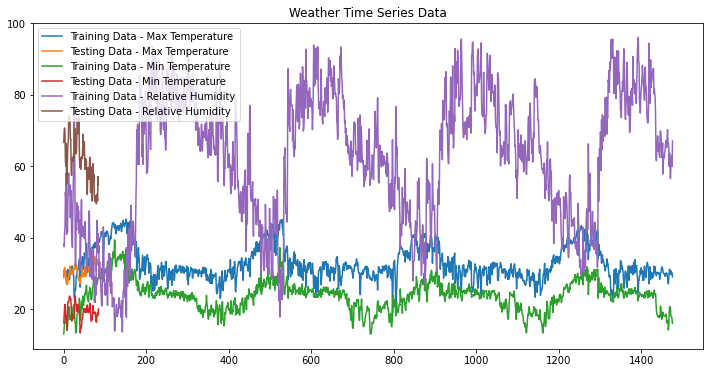

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90181D+00    |proj g|=  2.10317D-01


 This problem is unconstrained.



At iterate    5    f=  1.77724D+00    |proj g|=  4.22467D-02

At iterate   10    f=  1.76328D+00    |proj g|=  9.87986D-03

At iterate   15    f=  1.76277D+00    |proj g|=  3.59333D-04

At iterate   20    f=  1.76277D+00    |proj g|=  1.30301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   6.381D-07   1.763D+00
  F =   1.7627681049831874     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Root Mean Squared Error for Minimum Temperature: 5.54
Mean Absolute Percentage Error for Minimum Temperature: 0.25
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  1.99527D+00    |proj g|=  3.27565D-02

At iterate   10    f=  1.98415D+00    |proj g|=  5.21147D-03

At iterate   15    f=  1.98273D+00    |proj g|=  1.64940D-03

At iterate   20    f=  1.98261D+00    |proj g|=  3.63515D-04

At iterate   25    f=  1.98260D+00    |proj g|=  4.96228D-04

At iterate   30    f=  1.98260D+00    |proj g|=  1.03121D-04

At iterate   35    f=  1.98260D+00    |proj g|=  1.76070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     48      1     0     0   1.761D-05   1.983D+00
  F =   1.9825954998208926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.18779D+00    |proj g|=  2.36436D-02

At iterate   10    f=  3.17512D+00    |proj g|=  2.67577D-02

At iterate   15    f=  3.15891D+00    |proj g|=  1.93435D-03

At iterate   20    f=  3.15729D+00    |proj g|=  2.59724D-03

At iterate   25    f=  3.15646D+00    |proj g|=  1.06922D-03

At iterate   30    f=  3.15640D+00    |proj g|=  3.72417D-04

At iterate   35    f=  3.15639D+00    |proj g|=  4.77312D-05

At iterate   40    f=  3.15639D+00    |proj g|=  1.98684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     46      1     0     0   8.269D-06   3.156D+00
  F =   3.15639114382

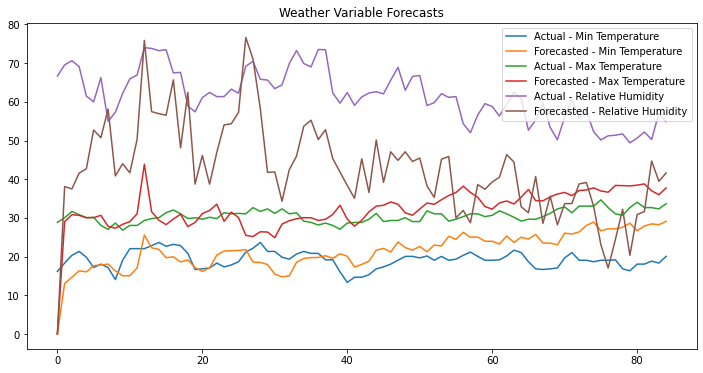

In [11]:
df_nizamabad = df[df['Location'] == 'Nizamabad']

df_nizamabad['Date'] = pd.to_datetime(df_nizamabad['Date'])
df_nizamabad.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_nizamabad['2019-01-01':'2022-11-30'].reset_index(drop=True)
test_data = df_nizamabad['2022-12-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['Maximum Temperature'], label='Training Data - Max Temperature')
plt.plot(test_data['Maximum Temperature'], label='Testing Data - Max Temperature')
plt.plot(train_data['Minimum Temperature'], label='Training Data - Min Temperature')
plt.plot(test_data['Minimum Temperature'], label='Testing Data - Min Temperature')
plt.plot(train_data['Relative Humidity'], label='Training Data - Relative Humidity')
plt.plot(test_data['Relative Humidity'], label='Testing Data - Relative Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

temp_min_predictions = fit_and_forecast('Minimum Temperature', train_data, test_data)
temp_max_predictions = fit_and_forecast('Maximum Temperature', train_data, test_data)
humidity_predictions = fit_and_forecast('Relative Humidity', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['Minimum Temperature'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['Maximum Temperature'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['Relative Humidity'], label='Actual - Relative Humidity')
plt.plot(test_data.index, humidity_predictions, label='Forecasted - Relative Humidity')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

# start_date='2022-11-30'
# end_date= '2023-02-20'
# predictions_df_nizamabad = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Nizamabad', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
#                                'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
# predictions_df_nizamabad.set_index('Date', inplace=True)
# predictions_df_nizamabad = predictions_df_nizamabad.reset_index()
# predictions_df_nizamabad

# Khammam

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_8953/3301838514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_khammam['Date'] = pd.to_datetime(df_khammam['Date'])


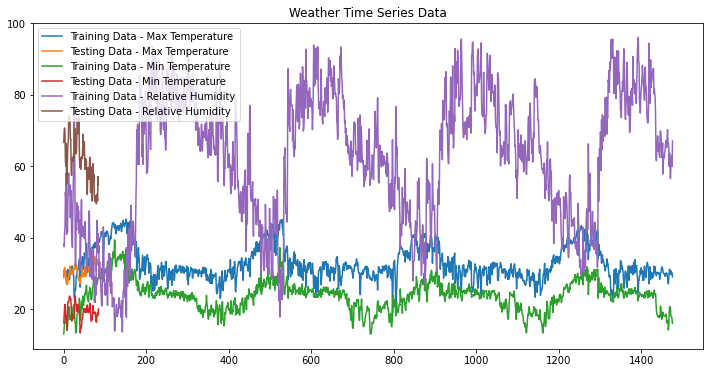

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90181D+00    |proj g|=  2.10317D-01

At iterate    5    f=  1.77724D+00    |proj g|=  4.22467D-02

At iterate   10    f=  1.76328D+00    |proj g|=  9.87986D-03

At iterate   15    f=  1.76277D+00    |proj g|=  3.59333D-04

At iterate   20    f=  1.76277D+00    |proj g|=  1.30301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   6.381D-07   1.763D+00
  F =   1.7627681049831874     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12744D+00    |proj g|=  1.63179D-01

At iterate    5    f=  1.99527D+00    |proj g|=  3.27565D-02

At iterate   10    f=  1.98415D+00    |proj g|=  5.21147D-03

At iterate   15    f=  1.98273D+00    |proj g|=  1.64940D-03

At iterate   20    f=  1.98261D+00    |proj g|=  3.63515D-04

At iterate   25    f=  1.98260D+00    |proj g|=  4.96228D-04

At iterate   30    f=  1.98260D+00    |proj g|=  1.03121D-04

At iterate   35    f=  1.98260D+00    |proj g|=  1.76070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.18779D+00    |proj g|=  2.36436D-02

At iterate   10    f=  3.17512D+00    |proj g|=  2.67577D-02

At iterate   15    f=  3.15891D+00    |proj g|=  1.93435D-03

At iterate   20    f=  3.15729D+00    |proj g|=  2.59724D-03

At iterate   25    f=  3.15646D+00    |proj g|=  1.06922D-03

At iterate   30    f=  3.15640D+00    |proj g|=  3.72417D-04

At iterate   35    f=  3.15639D+00    |proj g|=  4.77312D-05

At iterate   40    f=  3.15639D+00    |proj g|=  1.98684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     46      1     0     0   8.269D-06   3.156D+00
  F =   3.15639114382

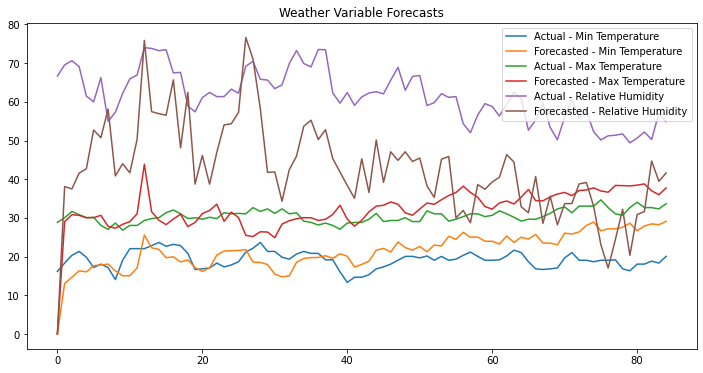

In [12]:
df_khammam = df[df['Location'] == 'Khammam']

df_khammam['Date'] = pd.to_datetime(df_khammam['Date'])
df_khammam.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_nizamabad['2019-01-01':'2022-11-30'].reset_index(drop=True)
test_data = df_nizamabad['2022-12-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['Maximum Temperature'], label='Training Data - Max Temperature')
plt.plot(test_data['Maximum Temperature'], label='Testing Data - Max Temperature')
plt.plot(train_data['Minimum Temperature'], label='Training Data - Min Temperature')
plt.plot(test_data['Minimum Temperature'], label='Testing Data - Min Temperature')
plt.plot(train_data['Relative Humidity'], label='Training Data - Relative Humidity')
plt.plot(test_data['Relative Humidity'], label='Testing Data - Relative Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

temp_min_predictions = fit_and_forecast('Minimum Temperature', train_data, test_data)
temp_max_predictions = fit_and_forecast('Maximum Temperature', train_data, test_data)
humidity_predictions = fit_and_forecast('Relative Humidity', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['Minimum Temperature'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['Maximum Temperature'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['Relative Humidity'], label='Actual - Relative Humidity')
plt.plot(test_data.index, humidity_predictions, label='Forecasted - Relative Humidity')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

# start_date='2022-11-30'
# end_date= '2023-02-20'
# predictions_df_khammam = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Khammam', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
#                                'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
# predictions_df_khammam.set_index('Date', inplace=True)
# predictions_df_khammam = predictions_df_khammam.reset_index()
# predictions_df_khammam

# Karimnagar

In [125]:
df = df23.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10950 entries, 0 to 1824
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   10950 non-null  datetime64[ns]
 1   District               10950 non-null  object        
 2   temp_min (⁰C)          10950 non-null  float64       
 3   temp_max (⁰C)          10950 non-null  float64       
 4   humidity_min (%)       10950 non-null  float64       
 5   humidity_max (%)       10950 non-null  float64       
 6   wind_speed_min (Kmph)  10950 non-null  float64       
 7   wind_speed_max (Kmph)  10950 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 769.9+ KB


/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_8953/1364288889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_karimnagar['Date'] = pd.to_datetime(df_karimnagar['Date'])


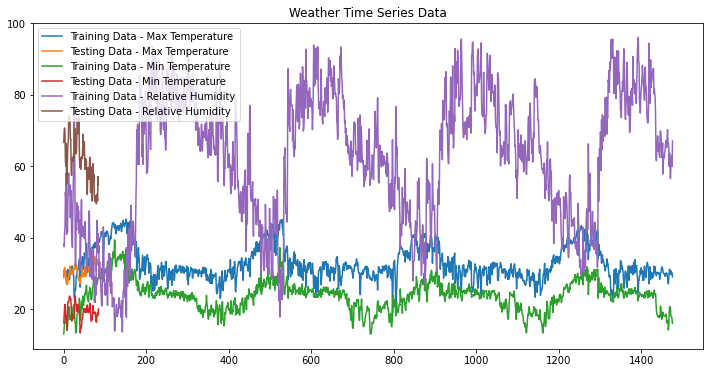

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90181D+00    |proj g|=  2.10317D-01

At iterate    5    f=  1.77724D+00    |proj g|=  4.22467D-02

At iterate   10    f=  1.76328D+00    |proj g|=  9.87986D-03

At iterate   15    f=  1.76277D+00    |proj g|=  3.59333D-04

At iterate   20    f=  1.76277D+00    |proj g|=  1.30301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   6.381D-07   1.763D+00
  F =   1.7627681049831874     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.99527D+00    |proj g|=  3.27565D-02

At iterate   10    f=  1.98415D+00    |proj g|=  5.21147D-03

At iterate   15    f=  1.98273D+00    |proj g|=  1.64940D-03

At iterate   20    f=  1.98261D+00    |proj g|=  3.63515D-04

At iterate   25    f=  1.98260D+00    |proj g|=  4.96228D-04

At iterate   30    f=  1.98260D+00    |proj g|=  1.03121D-04

At iterate   35    f=  1.98260D+00    |proj g|=  1.76070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     48      1     0     0   1.761D-05   1.983D+00
  F =   1.9825954998208926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.18779D+00    |proj g|=  2.36436D-02

At iterate   10    f=  3.17512D+00    |proj g|=  2.67577D-02

At iterate   15    f=  3.15891D+00    |proj g|=  1.93435D-03

At iterate   20    f=  3.15729D+00    |proj g|=  2.59724D-03

At iterate   25    f=  3.15646D+00    |proj g|=  1.06922D-03

At iterate   30    f=  3.15640D+00    |proj g|=  3.72417D-04

At iterate   35    f=  3.15639D+00    |proj g|=  4.77312D-05

At iterate   40    f=  3.15639D+00    |proj g|=  1.98684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     46      1     0     0   8.269D-06   3.156D+00
  F =   3.15639114382

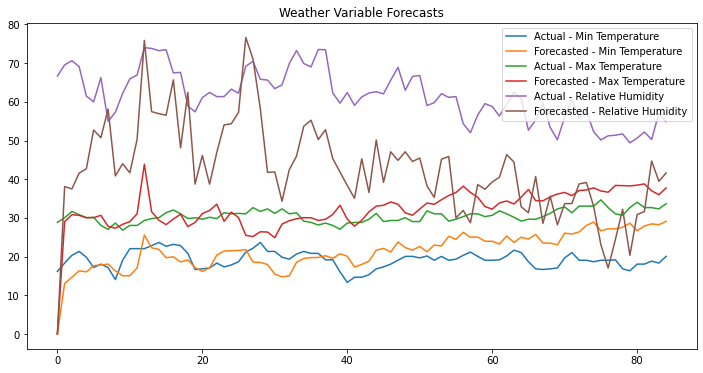

In [14]:
df_karimnagar = df[df['Location'] == 'Karimnagar']

df_karimnagar['Date'] = pd.to_datetime(df_karimnagar['Date'])
df_karimnagar.set_index('Date', inplace=True)

# Splitting Data into Training and Testing
train_data = df_nizamabad['2019-01-01':'2022-11-30'].reset_index(drop=True)
test_data = df_nizamabad['2022-12-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['Maximum Temperature'], label='Training Data - Max Temperature')
plt.plot(test_data['Maximum Temperature'], label='Testing Data - Max Temperature')
plt.plot(train_data['Minimum Temperature'], label='Training Data - Min Temperature')
plt.plot(test_data['Minimum Temperature'], label='Testing Data - Min Temperature')
plt.plot(train_data['Relative Humidity'], label='Training Data - Relative Humidity')
plt.plot(test_data['Relative Humidity'], label='Testing Data - Relative Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

temp_min_predictions = fit_and_forecast('Minimum Temperature', train_data, test_data)
temp_max_predictions = fit_and_forecast('Maximum Temperature', train_data, test_data)
humidity_predictions = fit_and_forecast('Relative Humidity', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['Minimum Temperature'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['Maximum Temperature'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['Relative Humidity'], label='Actual - Relative Humidity')
plt.plot(test_data.index, humidity_predictions, label='Forecasted - Relative Humidity')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

# start_date='2022-11-30'
# end_date= '2023-02-20'
# predictions_df_karimnagar = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Karimnagar', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
#                                'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
# predictions_df_karimnagar.set_index('Date', inplace=True)
# predictions_df_karimnagar = predictions_df_karimnagar.reset_index()
# predictions_df_karimnagar

# Warangal

/var/folders/69/7vt__1z91mb3zslygkxndqpw0000gn/T/ipykernel_8953/1003319079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warangal['Date'] = pd.to_datetime(df_warangal['Date'])


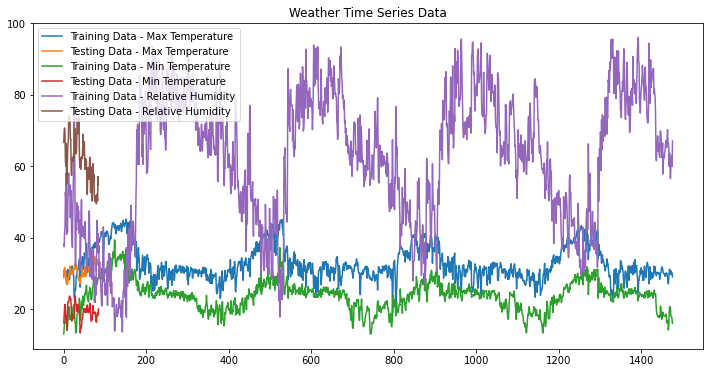

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90181D+00    |proj g|=  2.10317D-01

At iterate    5    f=  1.77724D+00    |proj g|=  4.22467D-02

At iterate   10    f=  1.76328D+00    |proj g|=  9.87986D-03

At iterate   15    f=  1.76277D+00    |proj g|=  3.59333D-04

At iterate   20    f=  1.76277D+00    |proj g|=  1.30301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   6.381D-07   1.763D+00
  F =   1.7627681049831874     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.99527D+00    |proj g|=  3.27565D-02

At iterate   10    f=  1.98415D+00    |proj g|=  5.21147D-03

At iterate   15    f=  1.98273D+00    |proj g|=  1.64940D-03

At iterate   20    f=  1.98261D+00    |proj g|=  3.63515D-04

At iterate   25    f=  1.98260D+00    |proj g|=  4.96228D-04

At iterate   30    f=  1.98260D+00    |proj g|=  1.03121D-04

At iterate   35    f=  1.98260D+00    |proj g|=  1.76070D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     48      1     0     0   1.761D-05   1.983D+00
  F =   1.9825954998208926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Users/aman/tensorflow-test/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  3.18779D+00    |proj g|=  2.36436D-02

At iterate   10    f=  3.17512D+00    |proj g|=  2.67577D-02

At iterate   15    f=  3.15891D+00    |proj g|=  1.93435D-03

At iterate   20    f=  3.15729D+00    |proj g|=  2.59724D-03

At iterate   25    f=  3.15646D+00    |proj g|=  1.06922D-03

At iterate   30    f=  3.15640D+00    |proj g|=  3.72417D-04

At iterate   35    f=  3.15639D+00    |proj g|=  4.77312D-05

At iterate   40    f=  3.15639D+00    |proj g|=  1.98684D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     46      1     0     0   8.269D-06   3.156D+00
  F =   3.15639114382

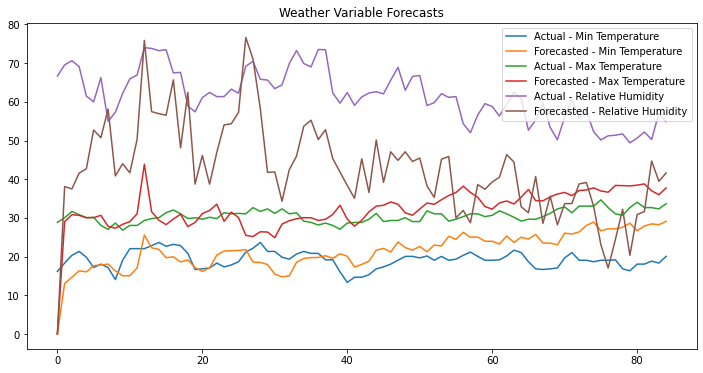

In [15]:
# Filtering data based on the location
df_warangal = df[df['Location'] == 'Warangal']

# Fixing the Date column
df_warangal['Date'] = pd.to_datetime(df_warangal['Date'])
df_warangal.set_index('Date', inplace=True)


# Splitting Data into Training and Testing
train_data = df_nizamabad['2019-01-01':'2022-11-30'].reset_index(drop=True)
test_data = df_nizamabad['2022-12-01':].reset_index(drop=True)

# Visualizing Data
plt.figure(figsize=(12,6))
plt.plot(train_data['Maximum Temperature'], label='Training Data - Max Temperature')
plt.plot(test_data['Maximum Temperature'], label='Testing Data - Max Temperature')
plt.plot(train_data['Minimum Temperature'], label='Training Data - Min Temperature')
plt.plot(test_data['Minimum Temperature'], label='Testing Data - Min Temperature')
plt.plot(train_data['Relative Humidity'], label='Training Data - Relative Humidity')
plt.plot(test_data['Relative Humidity'], label='Testing Data - Relative Humidity')
plt.title('Weather Time Series Data')
plt.legend()
plt.show()

temp_min_predictions = fit_and_forecast('Minimum Temperature', train_data, test_data)
temp_max_predictions = fit_and_forecast('Maximum Temperature', train_data, test_data)
humidity_predictions = fit_and_forecast('Relative Humidity', train_data, test_data)

plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data['Minimum Temperature'], label='Actual - Min Temperature')
plt.plot(test_data.index, temp_min_predictions, label='Forecasted - Min Temperature')
plt.plot(test_data.index, test_data['Maximum Temperature'], label='Actual - Max Temperature')
plt.plot(test_data.index, temp_max_predictions, label='Forecasted - Max Temperature')
plt.plot(test_data.index, test_data['Relative Humidity'], label='Actual - Relative Humidity')
plt.plot(test_data.index, humidity_predictions, label='Forecasted - Relative Humidity')
plt.title('Weather Variable Forecasts')
plt.legend()
plt.show()

# start_date='2022-11-30'
# end_date= '2023-02-20'
# predictions_df_warangal = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D'),'District': 'Warangal', 'temp_min (⁰C)': temp_min_predictions,'temp_max (⁰C)':temp_max_predictions,'humidity_min (%)':humidity_min_predictions,'humidity_max (%)':humidity_max_predictions, 
#                                'wind_speed_min (Kmph)':wind_speed_min_predictions,'wind_speed_max (Kmph)':wind_speed_max_predictions})
# predictions_df_warangal.set_index('Date', inplace=True)
# predictions_df_warangal = predictions_df_warangal.reset_index()
# predictions_df_warangal

# Merging all datasets into single dataframe

In [137]:
# Concating all the predictions into single dataframe

# combined_df = pd.concat([predictions_df_adilabad, predictions_df_nizamabad, predictions_df_khammam, predictions_df_karimnagar, predictions_df_warangal], ignore_index=True)

In [16]:
# combined_df

In [17]:
# combined_df.describe()

In [144]:
# combined_df.to_csv('Weather_2023_forecasted.csv',index=False)